# "[속보]", 180일(매일), 관련도순, 상위20개 기사

In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service

# ChromeDriver 경로 설정
driver_path = "/Users/leesangwon/Desktop/chromedriver-mac-arm64/chromedriver"  # 여기에 ChromeDriver의 경로를 입력
service = Service(driver_path)

# 웹드라이버 초기화
driver = webdriver.Chrome(service=service)

### 테스트

In [8]:
# 한글 인코딩
import urllib.parse

text = "[속보]"

# URL 인코딩
encoded_text = urllib.parse.quote(text)

year = "2024"
month = "02"
start_d = "15"
end_d = "31"


# 정렬 옵션 sort=0 : 관련도순    sort=1 : 최신순    sort=2 : 오래된순             # 언론사 옵션 mynews=0 : 전체    mynews=1 : 일간지
# 오래된순 정렬, 일간지 언론사
# url = f"https://search.naver.com/search.naver?where=news&query={encoded_text}&sm=tab_opt&sort=2&photo=0&field=0&pd=3&ds={year}.{month}.{start_d}&de={year}.{month}.{end_d}&docid=&related=0&mynews=1&office_type=3&office_section_code=0&news_office_checked=&nso=so%3Ar%2Cp%3Afrom{year}{month}{start_d}to{year}{month}{end_d}&is_sug_officeid=0&office_category=1&service_area=0"
# 관련도순 정렬, 전체 언론사
url = f"https://search.naver.com/search.naver?where=news&query={encoded_text}&sm=tab_opt&sort=0&photo=0&field=0&pd=3&ds={year}.{month}.{start_d}&de={year}.{month}.{end_d}&docid=&related=0&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so%3Ar%2Cp%3Afrom{year}{month}{start_d}to{year}{month}{end_d}&is_sug_officeid=0&office_category=0&service_area=0"


print(url)


# 웹사이트 열기
driver.get(url)

https://search.naver.com/search.naver?where=news&query=%5B%EC%86%8D%EB%B3%B4%5D&sm=tab_opt&sort=0&photo=0&field=0&pd=3&ds=2024.02.15&de=2024.02.31&docid=&related=0&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so%3Ar%2Cp%3Afrom20240215to20240231&is_sug_officeid=0&office_category=0&service_area=0


### 최종 월별 크롤링 코드

In [44]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import urllib.parse
import time
import pandas as pd

# 데이터프레임 리스트 초기화
all_data = []

#####################################################
# 검색어, 연도, 월 설정
text = "[속보]"
year = ['2024']
month = ['05']
#####################################################

# ChromeDriver 경로 설정
driver_path = "/Users/leesangwon/Desktop/chromedriver-mac-arm64/chromedriver"  # 여기에 ChromeDriver의 경로를 입력
service = Service(driver_path)

# 웹드라이버 초기화
driver = webdriver.Chrome(service=service)

# 연도, 월을 순회하며 크롤링
for y in year:
    for m in month:
        # 월의 마지막 날짜 계산
        if m == '01' or m == '03' or m == '05' or m == '07' or m == '08' or m == '10' or m == '12':
            last_day = 31
        elif m == '04' or m == '06' or m == '09' or m == '11':
            last_day = 30
        else:  # 2월 (윤년은 29일)
            last_day = 29

        # 하루 단위로 크롤링
        for day in range(1, last_day + 1):
            start_d = str(day).zfill(2)  # 01, 02, ..., 31 형태로 만들어줌
            end_d = start_d  # 하루 단위로 크롤링하므로 시작일과 종료일이 같음

            # URL 생성
            encoded_text = urllib.parse.quote(text)  # 검색어를 url 인코딩
            url = f"https://search.naver.com/search.naver?where=news&query={encoded_text}&sm=tab_opt&sort=0&photo=0&field=0&pd=3&ds={y}.{m}.{start_d}&de={y}.{m}.{end_d}&docid=&related=0&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so%3Ar%2Cp%3Afrom{y}{m}{start_d}to{y}{m}{end_d}&is_sug_officeid=0&office_category=0&service_area=0"

            # 페이지 열기
            driver.get(url)

            # 스크롤 1~2번 내리기
            last_height = driver.execute_script("return document.body.scrollHeight")
            for _ in range(2):  # 1~2번 스크롤 내리기
                driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
                time.sleep(2)
                new_height = driver.execute_script("return document.body.scrollHeight")
                if new_height == last_height:
                    break
                last_height = new_height

            # 기사 제목, 날짜, 스크립트 크롤링
            titles = driver.find_elements(By.CSS_SELECTOR, ".news_tit")
            dates = driver.find_elements(By.CSS_SELECTOR, ".info_group > span")
            scripts = driver.find_elements(By.CSS_SELECTOR, ".dsc_txt_wrap")
            press = driver.find_elements(By.CSS_SELECTOR, ".info_group > a.press")

            # 상위 20개 기사만 저장
            for title, date, script, p in zip(titles[:20], dates[:20], scripts[:20], press[:20]):
                all_data.append({
                    "Title": title.text,
                    "Date": date.text,
                    "Press": p.text,
                    "Description": script.text
                })

# 데이터프레임 생성 및 저장
df1 = pd.DataFrame(all_data)
df1.to_csv(f"/Users/leesangwon/Downloads/{text}_{month}월_news_data.csv", index=False)

# 드라이버 종료
driver.quit()

In [45]:
import pandas as pd
aaa = pd.read_csv(f"/Users/leesangwon/Downloads/[속보]_['05']월_news_data.csv")
aaa

,Title,Date,Press,Description
0,[속보]4월 수출 13.8% 증가…대미 수출 역대 최대 기록,2024.05.01.,경향신문언론사 선정,한국의 4월 수출이 지난해보다 13.8% 증가하면서 7개월 연속 ‘수출 플러스’ 행...
1,"[속보]여야, 이태원특별법 합의…2일 본회의서 처리",2024.05.01.,국제신문언론사 선정,여야가 이태원 참사 특별법(10·29이태원참사 피해자 권리보장과 진상규명 및 재발방...
2,[속보] 與 사무총장에 배준영 내정…부총장에 서지영·김종혁,2024.05.01.,문화일보언론사 선정,국민의힘은 1일 사무총장 직무대행인 배준영(사진) 의원을 사무총장으로 내정했다고 밝...
3,[속보] 4월 수출 13.8%↑…7개월 연속 '수출 플러스',2024.05.01.,한국경제언론사 선정,한국의 4월 수출이 지난해보다 13.8% 증가하면서 7개월 연속 '수출 플러스'를 ...
4,"[속보] 대통령실 ""이태원특별법 여야 합의 환영... 협치 성과""",2024.05.01.,한국일보언론사 선정,여야가 1일 '이태원 참사 진상규명 특별법'을 처리하기로 합의하자 대통령실은 즉각 ...
...,...,...,...,...
615,"[속보] 대법원, 김의철 전 KBS사장 해임처분 집행정지 신청 기각",2024.05.31.,미디어오늘언론사 선정,대법원이 지난 29일 김의철 전 KBS 사장이 윤석열 대통령을 상대로 제기한 해임처...
616,"[속보] 尹정부, 원전 3기 더 짓는다…야당·환경단체 반발 불가피",2024.05.31.,국제신문언론사 선정,첨단산업 신규 투자 등에 따른 전력수요 급증에 대응하기 위해 2038년까지 최대 3...
617,"[속보] “바이든, ‘美 무기 사용’ 러시아 영토공격 일부 허용”",2024.05.31.,세계일보언론사 선정,기사 특정내용과 무관. 바흐무트=AP/뉴시스 조 바이든 행정부가 비밀리에 우크라이나...
618,[속보] 강남 오피스텔에서 모녀 살해한 뒤 도주...60대 용의자 체포,2024.05.31.,YTN언론사 선정,강남에 있는 오피스텔에서 50대 여성과 그 딸에게 흉기를 휘둘러 숨지게 한 뒤 도주...


In [46]:
date_group = aaa.groupby('Date').size().reset_index(name='Count')
date_group.head(50)

,Date,Count
0,1면 1단,2
1,2024.05.01.,20
2,2024.05.02.,20
3,2024.05.03.,20
4,2024.05.04.,20
5,2024.05.05.,20
6,2024.05.06.,20
7,2024.05.07.,20
8,2024.05.08.,20
9,2024.05.09.,20


### NLP

In [37]:
!pip install konlpy
!pip install wordcloud
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [48]:
from konlpy.tag import Okt

def okt_tokenizer(text, return_nouns_only=True):
    """ 
    input: korean text
    output: tokens
    
    if return_nouns_only option is True, only nouns will be extracted.
    """
    okt = Okt()
    
    if return_nouns_only:
        tokens = okt.nouns(text)
    else:
        tokens = okt.morphs(text)
    
    # you can refer to the site below that lists Korean stopwords
    # https://www.ranks.nl/stopwords/korean
    stopwords = ['입니다', '은', '는', '이', '가', '이거', '저거', '그거', '여기', '이쪽', ]
    tokens = [n for n in tokens if n not in stopwords]
    return tokens

In [49]:
# Combine 'Title' and 'Description' columns into a list of words, split by commas
combined_list = []

# Iterate through each row in the dataframe
for _, row in aaa.iterrows():
    title_words = row['Title'].split(' ')
    description_words = row['Description'].split(' ') if isinstance(row['Description'], str) else []
    combined_list.extend(title_words + description_words)

# The combined list of words
combined_list

['[속보]4월',
 '수출',
 '13.8%',
 '증가…대미',
 '수출',
 '역대',
 '최대',
 '기록',
 '한국의',
 '4월',
 '수출이',
 '지난해보다',
 '13.8%',
 '증가하면서',
 '7개월',
 '연속',
 '‘수출',
 '플러스’',
 '행진을',
 '이어가고',
 '있다.',
 '산업통상자원부는',
 '지난달',
 '수출액이',
 '562억6000만달러로',
 '지난해',
 '같은',
 '기간보다',
 '13.8%',
 '증가했다고',
 '1일',
 '밝혔다.',
 '4월',
 '무역수지는',
 '15억3000만달러로',
 '흑자를',
 '기록했다.',
 '품목별로는',
 '15대',
 '주력',
 '수출',
 '품목',
 '중',
 '13개...',
 '[속보]여야,',
 '이태원특별법',
 '합의…2일',
 '본회의서',
 '처리',
 '여야가',
 '이태원',
 '참사',
 '특별법(10·29이태원참사',
 '피해자',
 '권리보장과',
 '진상규명',
 '및',
 '재발방지를',
 '위한',
 '특별법안)을',
 '처리하기로',
 '1일',
 '합의했다.',
 '여야는',
 '오는',
 '2일',
 '본회의를',
 '연다.',
 '이양수',
 '국민의힘',
 '원내수석부대표와',
 '박주민',
 '더불어민주당',
 '원내수석부대표는',
 '이날',
 '국회에서',
 '공동',
 '기자회견을',
 '해',
 '이처럼',
 '밝혔다.',
 '이태원',
 '참사...',
 '[속보]',
 '與',
 '사무총장에',
 '배준영',
 '내정…부총장에',
 '서지영·김종혁',
 '국민의힘은',
 '1일',
 '사무총장',
 '직무대행인',
 '배준영(사진)',
 '의원을',
 '사무총장으로',
 '내정했다고',
 '밝혔다.',
 '4·10',
 '총선',
 '인천',
 '중구·강화·옹진에서',
 '재선에',
 '성공한',
 '배',
 '의원은',
 '총선',
 '직후',
 '장동혁',
 '전',
 '사무총장이',
 '사퇴하자'

In [50]:
result = ' '.join(combined_list)  # 공백으로 결합
print(result)

[속보]4월 수출 13.8% 증가…대미 수출 역대 최대 기록 한국의 4월 수출이 지난해보다 13.8% 증가하면서 7개월 연속 ‘수출 플러스’ 행진을 이어가고 있다. 산업통상자원부는 지난달 수출액이 562억6000만달러로 지난해 같은 기간보다 13.8% 증가했다고 1일 밝혔다. 4월 무역수지는 15억3000만달러로 흑자를 기록했다. 품목별로는 15대 주력 수출 품목 중 13개... [속보]여야, 이태원특별법 합의…2일 본회의서 처리 여야가 이태원 참사 특별법(10·29이태원참사 피해자 권리보장과 진상규명 및 재발방지를 위한 특별법안)을 처리하기로 1일 합의했다. 여야는 오는 2일 본회의를 연다. 이양수 국민의힘 원내수석부대표와 박주민 더불어민주당 원내수석부대표는 이날 국회에서 공동 기자회견을 해 이처럼 밝혔다. 이태원 참사... [속보] 與 사무총장에 배준영 내정…부총장에 서지영·김종혁 국민의힘은 1일 사무총장 직무대행인 배준영(사진) 의원을 사무총장으로 내정했다고 밝혔다. 4·10 총선 인천 중구·강화·옹진에서 재선에 성공한 배 의원은 총선 직후 장동혁 전 사무총장이 사퇴하자 사무총장 직무대행을 맡았었다. 전략기획부총장에는 당직자 출신으로 부산 동래에서 당선된 서지영 당선인이... [속보] 4월 수출 13.8%↑…7개월 연속 '수출 플러스' 한국의 4월 수출이 지난해보다 13.8% 증가하면서 7개월 연속 '수출 플러스'를 기록했다. 자동차 수출은 67억9000만달러로 역대 최대액을 경신했고, 반도체를 비롯한 디스플레이·무선통신·컴퓨터 등 4대 정보기술(IT) 분야 품목의 수출 증가율도 모두 동시에 플러스를 이어갔다. 산업통상자원부는 1일... [속보] 대통령실 "이태원특별법 여야 합의 환영... 협치 성과" 여야가 1일 '이태원 참사 진상규명 특별법'을 처리하기로 합의하자 대통령실은 즉각 "환영한다"고 밝혔다. 김수경 대통령실 대변인은 용산 대통령실 브리핑에서 "오늘 여야가 '이태원특별법' 합의를 이룬 데 대해 환영한다"고 말했다. 김 대변인은 "(지난달) 2

In [51]:
from konlpy.tag import Okt

okt = Okt()
nouns = okt.nouns(result)  # 명사 추출
print(nouns)

['속보', '수출', '증가', '대미', '수출', '역대', '최대', '기록', '한국', '수출', '지난해', '증가', '개월', '연속', '수출', '플러스', '행진', '어가', '산업', '통상', '자원부', '지난달', '수출', '액', '지난해', '기간', '증가', '무역수지', '흑자', '기록', '품목', '별로', '주력', '수출', '품목', '중', '개', '속보', '여야', '이태원', '특별법', '합의', '본회의', '처리', '여야', '이태원', '참사', '특별법', '이태원', '참사', '피해자', '권리', '보장', '진상', '규명', '및', '재발', '방지', '위', '특별', '법안', '처리', '합의', '여야', '본회의', '연', '양수', '국민', '힘', '부', '대표', '박주민', '민주당', '부', '대표', '날', '국회', '공동', '기자회견', '해', '이처럼', '이태원', '참사', '속보', '사무', '총장', '배준영', '내정', '부총', '서지영', '김종', '혁', '국민', '힘', '사무', '총장', '직무', '대행', '배준영', '사진', '의원', '사무', '총장', '내정', '총선', '인천', '중구', '강화', '옹진', '재선', '배', '의원', '총선', '직후', '장동혁', '전', '사무', '총장', '사퇴', '사무', '총장', '직무', '대행', '전략기획', '부총', '당직', '출신', '부산', '동래', '당선', '서지영', '당선인', '속보', '수출', '개월', '연속', '수출', '플러스', '한국', '수출', '지난해', '증가', '개월', '연속', '수출', '플러스', '를', '기록', '자동차', '수출', '역대', '최대', '액', '경신', '반도체', '비롯', '디스플레이', '무선통신', '컴퓨터', '등', '정보기술', '분야', '품목

{'가가': 2, '가결': 5, '가금': 1, '가까스레': 1, '가까이': 1, '가늠': 1, '가능': 2, '가능성': 5, '가닥': 2, '가담': 1, '가량': 1, '가로': 1, '가방': 5, '가사': 3, '가상': 5, '가석방': 26, '가수': 26, '가스': 3, '가슴': 1, '가야': 2, '가운데': 12, '가자지구': 7, '가장': 3, '가정': 1, '가정법원': 1, '가족': 4, '가중': 10, '가지': 1, '가짜': 1, '가처분': 9, '가치': 4, '가해': 2, '각각': 6, '각자': 2, '각종': 8, '각하': 4, '간담': 4, '간부': 7, '간암': 2, '간의': 1, '간접': 1, '간주': 2, '간첩': 1, '간호': 1, '갈대': 2, '갈등': 6, '갈무리': 1, '감각': 1, '감독': 6, '감사': 2, '감세': 1, '감소': 6, '감정': 1, '감청': 2, '감행': 1, '강경': 1, '강남': 17, '강남구': 3, '강남역': 3, '강도': 2, '강도현': 4, '강동구': 3, '강등': 1, '강력': 2, '강모': 1, '강사': 2, '강성': 1, '강수': 2, '강수량': 1, '강씨': 1, '강원': 4, '강원도': 2, '강제': 2, '강조': 5, '강풍': 1, '강행': 3, '강화': 8, '개국': 2, '개발': 15, '개방': 3, '개봉': 1, '개선': 2, '개시': 3, '개원': 1, '개월': 31, '개인': 9, '개인정보': 2, '개입': 2, '개정': 7, '개정안': 19, '개최': 16, '개편': 2, '개혁': 44, '거대': 3, '거듭': 1, '거래': 17, '거래소': 7, '거론': 3, '거리': 11, '거버넌스': 2, '거부': 3, '거부권': 26, '거절': 2, '거주': 1, '건강': 3, '건물': 5, '건의': 8

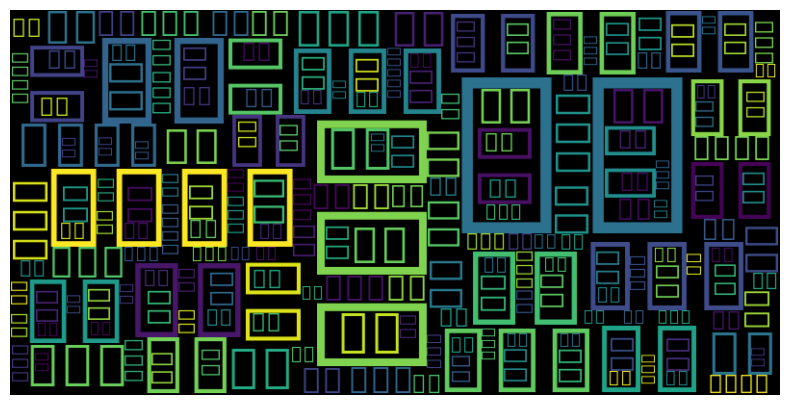

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 예시 리스트 (단어들이 들어 있는 리스트)

# 리스트를 문자열로 변환 (워드클라우드를 만들기 위해)
text = ' '.join(nouns)

# CountVectorizer를 사용하여 텍스트 벡터화
vectorizer = CountVectorizer(stop_words=None)  # stop_words=None을 사용하여 불용어 제외
X = vectorizer.fit_transform([text])

# 벡터화된 단어와 그 빈도수 출력
word_freq = dict(zip(vectorizer.get_feature_names_out(), X.toarray().flatten()))
print(word_freq)

# 워드클라우드 생성
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(word_freq)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [53]:
ddff = pd.DataFrame(list(word_freq.items()), columns=['Word', 'Frequency'])
ddff

ddff.to_csv("/Users/leesangwon/Downloads/예시클라우드용_5월_단어빈도.csv", index=False)